In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

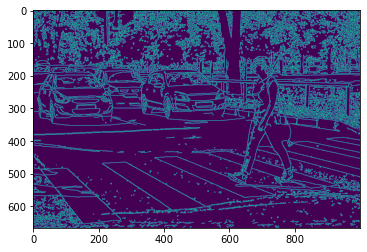

In [5]:
image = cv2.imread('ped_crossing.jpg')
lane_image = np.copy(image)
canny = cv2.Canny(lane_image,threshold1=100, threshold2=200,apertureSize=3, L2gradient=True) 
plt.imshow(canny)
plt.show()

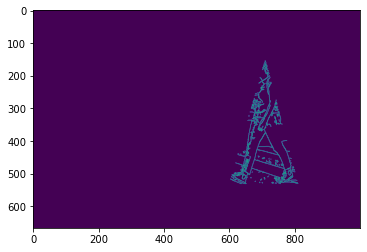

In [35]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
    [(600, 530), (810, 530), (710, 150),]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

mask = region_of_interest(canny)
plt.imshow(mask)
plt.show()

In [78]:
lines = cv2.HoughLinesP(mask, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
lines

array([[[639, 512, 650, 458]],

       [[664, 409, 677, 353]],

       [[687, 314, 697, 274]],

       [[639, 491, 654, 429]],

       [[716, 206, 724, 284]],

       [[670, 339, 681, 299]],

       [[707, 365, 737, 429]],

       [[668, 482, 753, 511]],

       [[659, 383, 670, 331]],

       [[772, 425, 795, 492]],

       [[717, 336, 744, 282]],

       [[677, 456, 766, 484]]], dtype=int32)

In [79]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

In [80]:
line_image = display_lines(lane_image, lines)

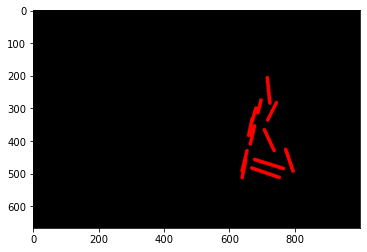

In [81]:
plt.imshow(line_image)
plt.show()

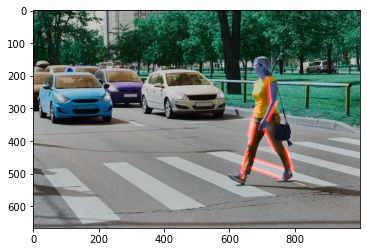

In [82]:
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
plt.imshow(combo_image)
plt.show()

In [134]:
other_image = cv2.imread('ped_crossing2.jpg')
canny_other = cv2.Canny(other_image,threshold1=100, threshold2=200,apertureSize=3, L2gradient=True) 

4


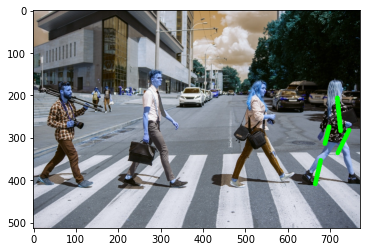

In [135]:
result_image = canny_other.copy()
cnt = 0
for line in lines:
    template = np.zeros_like(canny_other)
    for x1, y1, x2, y2 in line:
        cv2.line(template, (x1, y1), (x2, y2), (255, 0, 0), 10)
    
    # Perform template matching
    result = cv2.matchTemplate(canny_other, template, cv2.TM_CCOEFF_NORMED)
#     print(result)
    # Set a threshold for considering a match
    threshold = 0
    loc = np.where(result >= threshold)
    
    # Draw lines on the result image where the pattern is found
    for pt in zip(*loc[::-1]):
        for x1, y1, x2, y2 in line:
            cv2.line(other_image, (pt[0] + x1, pt[1] + y1), (pt[0] + x2, pt[1] + y2), (0, 255, 0), 10)
        cnt+=1

print(cnt)

plt.imshow(other_image)
plt.show()        
        

In [1]:
!pip install label-studio

  Using cached label_studio-1.9.2.post0-py3-none-any.whl (58.0 MB)
  Using cached rq-1.10.1-py2.py3-none-any.whl (70 kB)
  Using cached django_rq-2.5.1-py2.py3-none-any.whl (48 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached django_extensions-3.1.0-py3-none-any.whl (222 kB)
  Using cached google_cloud_appengine_logging-1.1.0-py2.py3-none-any.whl (14 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Vibhu\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached boxing-0.1.4-py3-none-any.whl (3.9 kB)
  Using cached rules-2.2.tar.gz (53 kB)
  Using cached redis-3.5.3-py2.py3-none-any.whl (72 kB)
  Using cached django_model_utils-4.1.1-py3-none-any.whl (32 kB)
  Using cached google_cloud_logging-2.7.2-py2.py3-none-any.whl (173 kB)
  Using cached attr-0.3.1.tar.gz (1.7 kB)
  Using cached google_auth-2.14.1-py2.py3-none-any.whl (175 kB)
  Using cached django_filter-2.4.0-py3-none-any.whl (73 kB)
  Using cached django_cors_headers-3.6.0-py3-none-any.whl (12 kB)
  Using cached boto-2.49.0-py2.py3-none-any.whl (1.4 MB)
  Using cached django-ranged-fileresponse-0.1.2.tar.gz (2.7 kB)
  Using cached drf_dynamic_fields-0.3.0-py2.py3-none-any.whl (6.6 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached xmljson-0.2.0-py2.py3-none-any.whl (14 kB)
  Using cached sentry_sdk-1.36.0-py2.py3-none-any.whl (249 kB)
  Using cached google_cloud_audit_log-0.2.0-py2.py3-none-any.whl (14 kB)
  Using cached ordered-set-4.0.2.t

  Created wheel for launchdarkly-server-sdk: filename=launchdarkly_server_sdk-7.5.0-py3-none-any.whl size=140881 sha256=ecf60fda586392c25619927adcb872b13a12259a00eaec3b36e048a1d75d7897
  Stored in directory: c:\users\vibhu\appdata\local\pip\cache\wheels\3b\ae\57\95b8bfd6bcbbf1574992e3720093934ac3e8c59b00b094784e
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=a0bd8e597c2546b72dffb72f23e5fc26ab89369e7e9ff30244a846b8dd88b7f5
  Stored in directory: c:\users\vibhu\appdata\local\pip\cache\wheels\c0\a1\09\0c736ab4beb6a48ae2f5f2529b2ad3770c8e6cc32d01d75a2c
  Created wheel for rules: filename=rules-2.2-py2.py3-none-any.whl size=25831 sha256=7cd3f24d32c0b912b26d992296de0c580ef440da1dec57fde6c508b33fb92b5f
  Stored in directory: c:\users\vibhu\appdata\local\pip\cache\wheels\55\eb\66\942cc7e565366729ad8313fece942ffb0f5a8900b8a6d02442
  Created wheel for django-ranged-fileresponse: filename=django_ranged_fileresponse-0.1.2-py3-none-any.whl size=324

In [3]:
!py -m label-studio

C:\Users\Vibhu\anaconda3\python.exe: No module named label-studio
